In [67]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix , classification_report

In [68]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray')

In [69]:
train_dir = '../input/fer2013/train'
test_dir = '../input/fer2013/test'

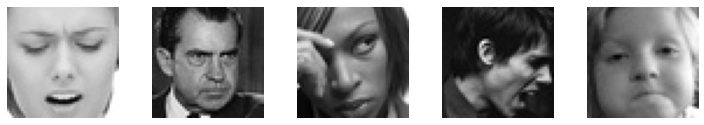

In [70]:
plot_images(train_dir + '/angry')

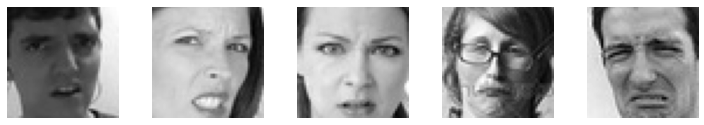

In [71]:
plot_images(train_dir + '/disgust')

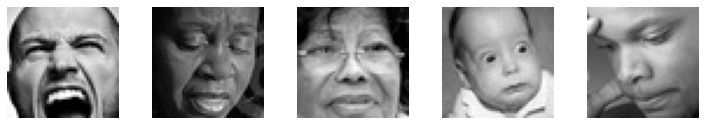

In [72]:
plot_images(train_dir + '/fear')

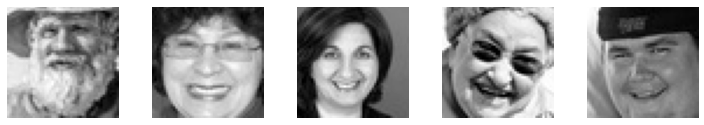

In [73]:
plot_images(train_dir + '/happy')

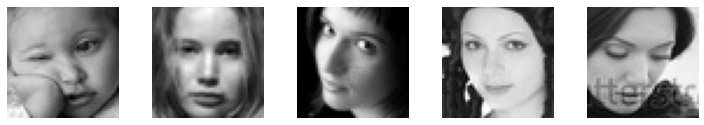

In [74]:
plot_images(train_dir + '/neutral')

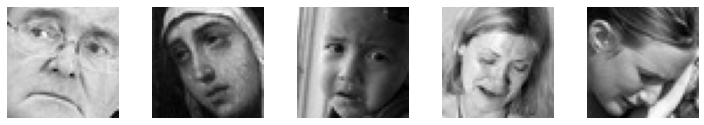

In [75]:
plot_images(train_dir + '/sad')

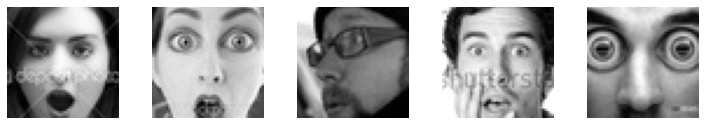

In [76]:
plot_images(train_dir + '/surprise')

In [77]:
def plot_bar_chart_diagram(path_data):
  dic={}
  for emotion in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+emotion):
      dem+=1
    dic[emotion]=dem
  print(dic,"\n")
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
  plt.show()

{'surprise': 3171, 'fear': 4097, 'angry': 3995, 'neutral': 4965, 'sad': 4830, 'disgust': 436, 'happy': 7215} 



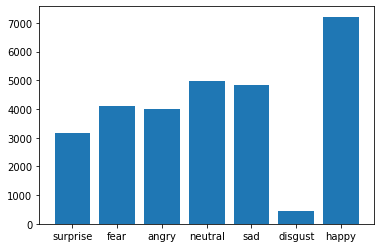

In [78]:
plot_bar_chart_diagram(train_dir)

{'surprise': 831, 'fear': 1024, 'angry': 958, 'neutral': 1233, 'sad': 1247, 'disgust': 111, 'happy': 1774} 



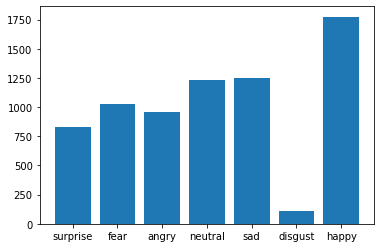

In [79]:
plot_bar_chart_diagram(test_dir)

In [80]:
datagen_train = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale = 1./255,
                                   validation_split = 0.2)
datagen_test = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

train_dgen = datagen_train.flow_from_directory('../input/fer2013/train',
                                              target_size = (48, 48),
                                              color_mode = "grayscale",
                                              class_mode = "categorical",
                                              batch_size = 64,
                                              shuffle = True)

test_dgen = datagen_test.flow_from_directory('../input/fer2013/test',
                                              target_size = (48, 48),
                                              color_mode = "grayscale",
                                              class_mode = "categorical",
                                              batch_size = 64,
                                              shuffle = False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [81]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [82]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = "same", input_shape = (48, 48, 1), activation = "relu"))

model.add(Conv2D(64, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation = "softmax"))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_15 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 128)      

In [83]:
model.compile(
    optimizer = "adam",
    loss = 'categorical_crossentropy',
    metrics =['accuracy'],
)

In [84]:
history = model.fit(x = train_dgen,
                    steps_per_epoch = train_dgen.n//train_dgen.batch_size,
                    epochs = 10,
                    validation_data = validation_dgen,
                    validation_steps = test_dgen.n//test_dgen.batch_size)

Epoch 1/10
448/448 [==============================] - 52s 114ms/step - loss: 2.1878 - accuracy: 0.2377 - val_loss: 1.9357 - val_accuracy: 0.2497
Epoch 2/10
448/448 [==============================] - 45s 101ms/step - loss: 1.6681 - accuracy: 0.3546 - val_loss: 1.5074 - val_accuracy: 0.4100
Epoch 3/10
448/448 [==============================] - 46s 103ms/step - loss: 1.4736 - accuracy: 0.4331 - val_loss: 1.3439 - val_accuracy: 0.4927
Epoch 4/10
448/448 [==============================] - 46s 103ms/step - loss: 1.3687 - accuracy: 0.4772 - val_loss: 1.4801 - val_accuracy: 0.4397
Epoch 5/10
448/448 [==============================] - 46s 103ms/step - loss: 1.3082 - accuracy: 0.4996 - val_loss: 1.1926 - val_accuracy: 0.5439
Epoch 6/10
448/448 [==============================] - 46s 103ms/step - loss: 1.2617 - accuracy: 0.5160 - val_loss: 1.1853 - val_accuracy: 0.5402
Epoch 7/10
448/448 [==============================] - 45s 101ms/step - loss: 1.2363 - accuracy: 0.5298 - val_loss: 1.1591 - val_ac

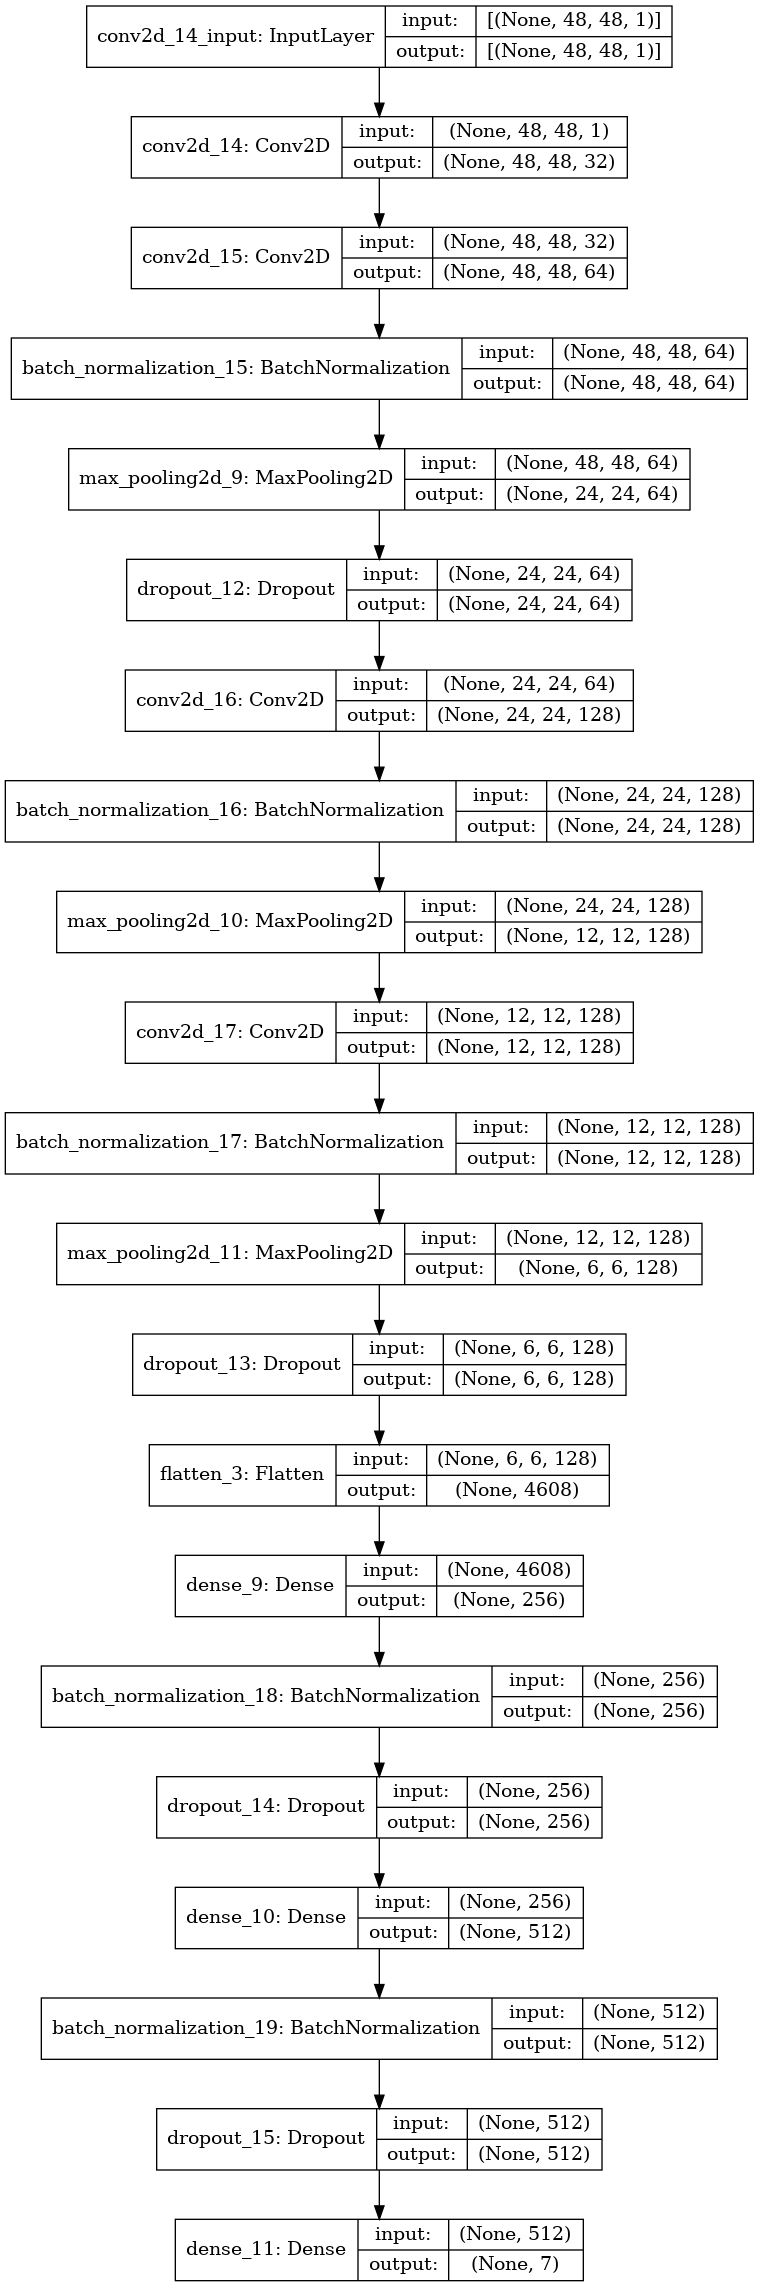

In [85]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file = 'convnet.png', show_shapes = True,show_layer_names = True)
Image(filename = 'convnet.png')

In [86]:
model.save("emotion_model.h5")

In [87]:
model_json = model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("emotion_model_weights.h5")

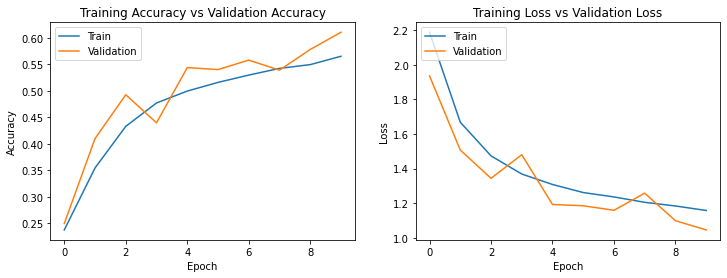

In [88]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [89]:
classes= ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [90]:
test_loss, test_acc = model.evaluate(test_dgen)
print("Validation Accuracy : ",test_acc*100, "%" )
print('Validation Loss : ', test_loss)

113/113 [==============================] - 12s 106ms/step - loss: 1.0917 - accuracy: 0.5882
Validation Accuracy :  58.81861448287964 %
Validation Loss :  1.0917176008224487


In [91]:
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

       angry       0.40      0.67      0.50       958
     disgust       0.64      0.16      0.26       111
        fear       0.44      0.29      0.35      1024
       happy       0.82      0.81      0.82      1774
     neutral       0.61      0.49      0.54      1233
         sad       0.48      0.47      0.47      1247
    surprise       0.70      0.76      0.73       831

    accuracy                           0.59      7178
   macro avg       0.59      0.52      0.53      7178
weighted avg       0.60      0.59      0.58      7178





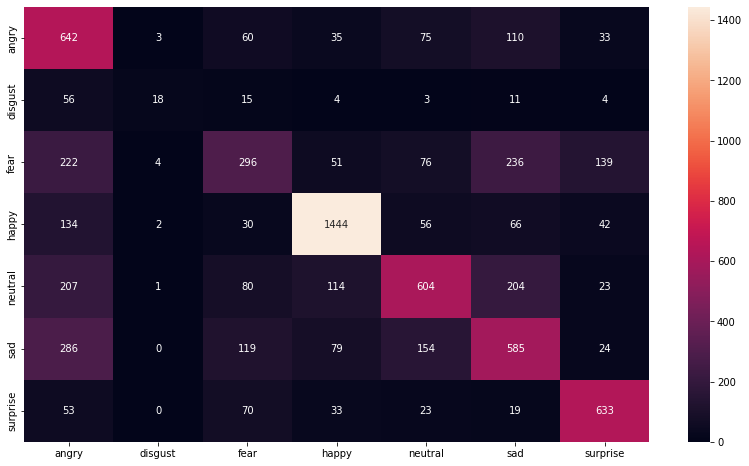

In [92]:
y_pred = np.argmax(model.predict(test_dgen), axis = -1)
print(classification_report(test_dgen.classes, y_pred, target_names = test_dgen.class_indices.keys()), end = '\n\n\n')

cm = confusion_matrix(test_dgen.classes, y_pred)
plt.figure(figsize = (14,8))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = test_dgen.class_indices.keys(), yticklabels = test_dgen.class_indices.keys())
plt.show()